In [35]:
import pandas as pd

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime with the specified format
df['Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Check if there are any parsing errors
print(df['Date'].isna().sum())

# Calculate required columns
df['NO'] = df['NO']
df['NO2'] = df['NO2']
df['NOx'] = df['NO'] + df['NO2']
df['VOCs'] = df['Toluene'] + df['Benzene']

# Define date ranges for filtering
before_fire = df[(df['Date'] >= '2024-04-19') & (df['Date'] <= '2024-04-21')]
during_fire = df[(df['Date'] >= '2024-04-22') & (df['Date'] <= '2024-04-24')]
after_fire = df[(df['Date'] >= '2024-04-25') & (df['Date'] <= '2024-04-27')]

# Check the filtered data
print(before_fire.head())
print(during_fire.head())
print(after_fire.head())


0
              From Date           To Date  PM2.5   PM10    NO   NO2    NOx  \
10464  19-04-2024 00:00  19-04-2024 00:15   58.0  277.0  85.8  65.9  151.7   
10465  19-04-2024 00:15  19-04-2024 00:30   58.0  277.0  87.0  67.6  154.6   
10466  19-04-2024 00:30  19-04-2024 00:45   58.0  277.0  90.6  66.6  157.2   
10467  19-04-2024 00:45  19-04-2024 01:00   67.0  290.0  96.8  67.2  164.0   
10468  19-04-2024 01:00  19-04-2024 01:15   67.0  290.0  99.3  69.2  168.5   

        NH3  SO2    CO  ...    RH   WS   WD   SR     BP  VWS    AT   RF  \
10464  35.5  4.5  2.92  ...  45.0  0.4  2.0  6.0  982.0  NaN  27.7  0.0   
10465  36.1  4.8  2.64  ...  45.0  0.3  2.0  6.0  982.0  NaN  27.7  0.0   
10466  37.6  4.8  2.56  ...  45.0  0.3  2.0  6.0  981.0  NaN  27.5  0.0   
10467  38.3  4.8  2.47  ...  44.0  0.6  2.0  6.0  981.0  NaN  27.5  0.0   
10468  38.5  5.4  2.45  ...  44.0  0.3  2.0  6.0  981.0  NaN  27.7  0.0   

                     Date  VOCs  
10464 2024-04-19 00:00:00   8.9  
10465 2024

0


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_1131/1213920665.py:43: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data.values(), labels=data.keys(), showmeans=True)


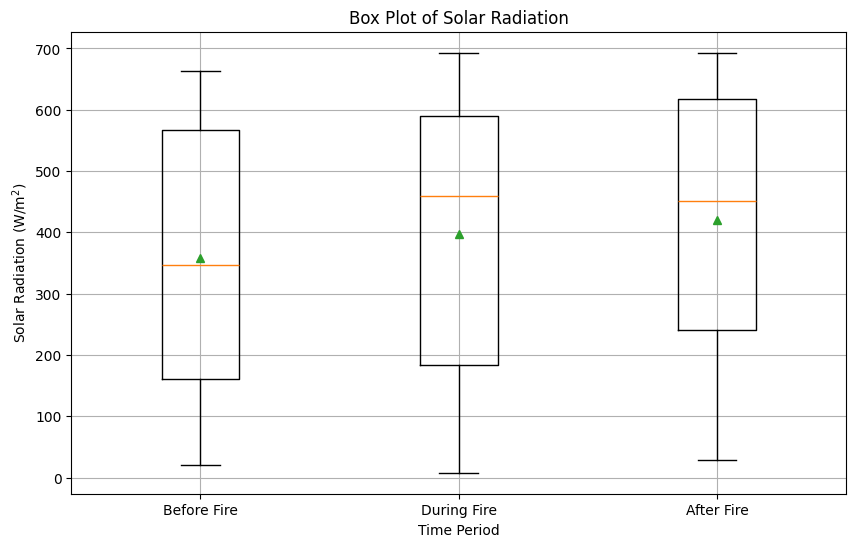

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime with the specified format
df['Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Check if there are any parsing errors
print(df['Date'].isna().sum())

# Calculate required columns
df['NO'] = df['NO']
df['NO2'] = df['NO2']
df['NOx'] = df['NO'] + df['NO2']
df['VOCs'] = df['Toluene'] + df['Benzene']

# Filter for daytime values (6 AM to 6 PM)
df = df[(df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 18)]

# Define date ranges for filtering
before_fire = df[(df['Date'] >= '2024-04-19') & (df['Date'] <= '2024-04-21')]
during_fire = df[(df['Date'] >= '2024-04-22') & (df['Date'] <= '2024-04-24')]
after_fire = df[(df['Date'] >= '2024-04-25') & (df['Date'] <= '2024-04-27')]

# Check if 'SR' column exists
if 'SR' not in df.columns:
    print("Column 'SR' does not exist in the dataset.")
else:
    # Extract the 'SR' column for each period
    data = {
        'Before Fire': before_fire['SR'].dropna(),
        'During Fire': during_fire['SR'].dropna(),
        'After Fire': after_fire['SR'].dropna()
    }
    
    # Create a box plot with means
    plt.figure(figsize=(10, 6))
    plt.boxplot(data.values(), labels=data.keys(), showmeans=True)
    plt.title('Box Plot of Solar Radiation')
    plt.xlabel('Time Period')
    plt.ylabel('Solar Radiation (W/m$^{2}$)')
    plt.grid(True)
    plt.show()


0


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_1131/475682058.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([before_fire['SR'].dropna(), during_fire['SR'].dropna(), after_fire['SR'].dropna()],


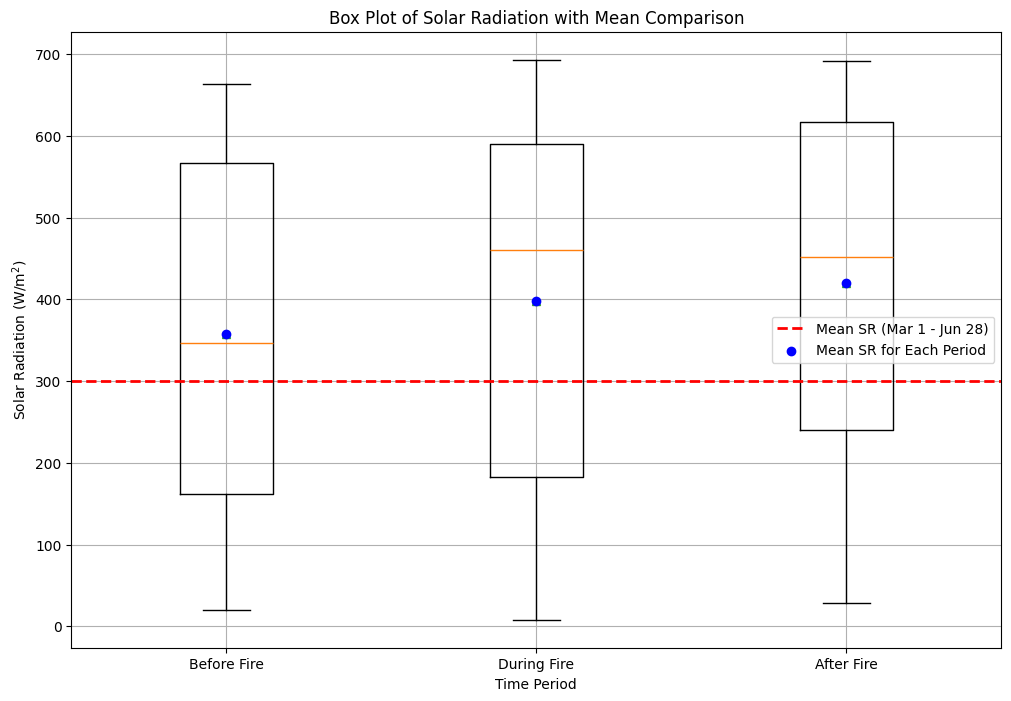

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime with the specified format
df['Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Check if there are any parsing errors
print(df['Date'].isna().sum())

# Filter for daytime values (6 AM to 6 PM)
df_daytime = df[(df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 18)]

# Define date ranges for filtering
before_fire = df_daytime[(df_daytime['Date'] >= '2024-04-19') & (df_daytime['Date'] <= '2024-04-21')]
during_fire = df_daytime[(df_daytime['Date'] >= '2024-04-22') & (df_daytime['Date'] <= '2024-04-24')]
after_fire = df_daytime[(df_daytime['Date'] >= '2024-04-25') & (df_daytime['Date'] <= '2024-04-27')]

# Filter data from March 1st to June 28th
march_to_june = df_daytime[(df_daytime['Date'] >= '2024-03-01') & (df_daytime['Date'] <= '2024-06-28')]

# Calculate mean SR for the entire March to June period
mean_sr_march_to_june = march_to_june['SR'].mean()

# Calculate mean SR for each period
mean_sr_before_fire = before_fire['SR'].mean()
mean_sr_during_fire = during_fire['SR'].mean()
mean_sr_after_fire = after_fire['SR'].mean()

# Plotting
plt.figure(figsize=(12, 8))

# Box plot for specified periods
plt.boxplot([before_fire['SR'].dropna(), during_fire['SR'].dropna(), after_fire['SR'].dropna()],
            labels=['Before Fire', 'During Fire', 'After Fire'],
            showmeans=True)

# Overlay mean SR line for the entire period (March 1 - June 28)
plt.axhline(mean_sr_march_to_june, color='red', linestyle='--', linewidth=2, label='Mean SR (Mar 1 - Jun 28)')

# Adding annotations for mean SR of each period
plt.scatter([1, 2, 3], [mean_sr_before_fire, mean_sr_during_fire, mean_sr_after_fire],
            color='blue', zorder=5, label='Mean SR for Each Period', marker='o')

# Formatting
plt.title('Box Plot of Solar Radiation with Mean Comparison')
plt.xlabel('Time Period')
plt.ylabel('Solar Radiation (W/m$^{2}$)')
plt.grid(True)
plt.legend()
plt.xticks(ticks=range(1, 4), labels=['Before Fire', 'During Fire', 'After Fire'])  # Adjust x-ticks for better alignment

plt.show()


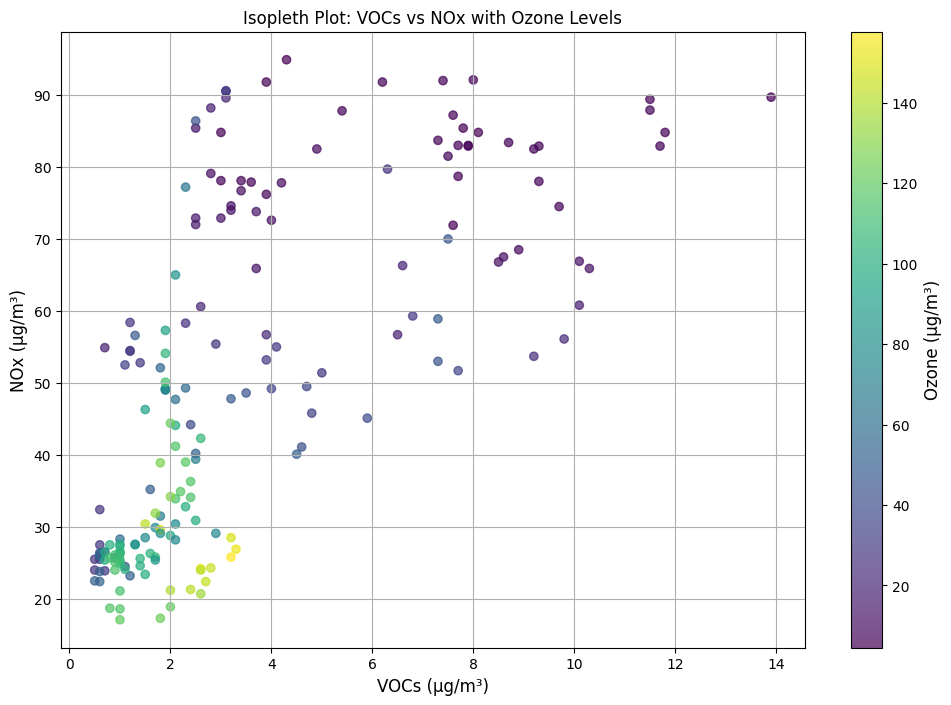

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime
df['Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Calculate required columns
df['NO'] = df['NO']
df['NO2'] = df['NO2']
df['NOx'] = df['NO'] + df['NO2']
df['VOCs'] = df['Toluene'] + df['Benzene']
df['Ozone'] = df['Ozone']

# Define date ranges for filtering (example for during_fire)
filtered_df = df[(df['Date'] >= '2024-04-22') & (df['Date'] <= '2024-04-24')]

# Create the scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=filtered_df['VOCs'], 
    y=filtered_df['NOx'], 
    c=filtered_df['Ozone'], 
    cmap='viridis', 
    alpha=0.7,
    edgecolor=None
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Ozone (µg/m³)', fontsize=12)

# Set axis labels with units
plt.title('Isopleth Plot: VOCs vs NOx with Ozone Levels')
plt.xlabel('VOCs (µg/m³)', fontsize=12)
plt.ylabel('NOx (µg/m³)', fontsize=12)
plt.grid(True)
plt.show()


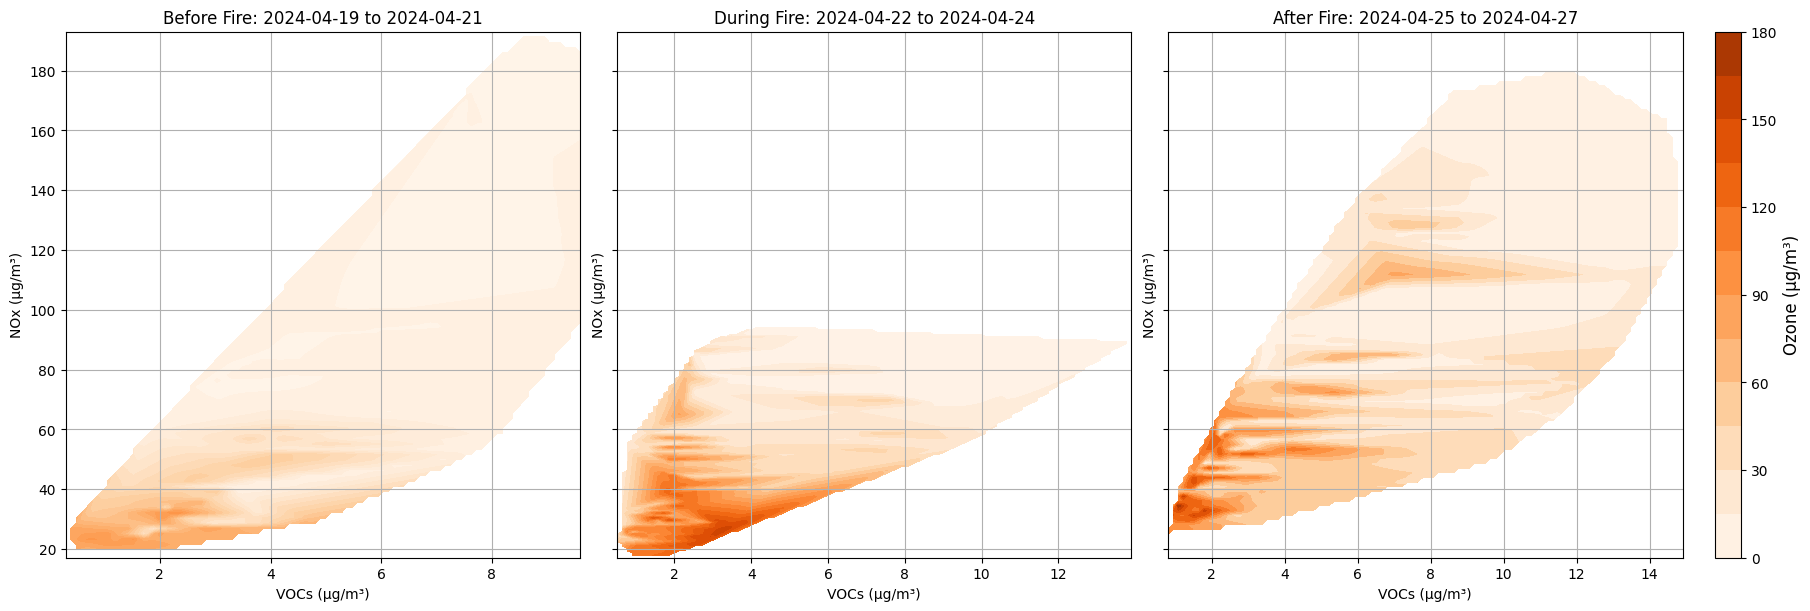

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime
df['Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Calculate required columns
df['NO'] = df['NO']
df['NO2'] = df['NO2']
df['NOx'] = df['NO'] + df['NO2']
df['VOCs'] = df['Toluene'] + df['Benzene']
df['Ozone'] = df['Ozone']

# Define date ranges and their titles
date_ranges = {
    'Before Fire': ('2024-04-19', '2024-04-21'),
    'During Fire': ('2024-04-22', '2024-04-24'),
    'After Fire': ('2024-04-25', '2024-04-27')
}

# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True, constrained_layout=True)

# Define a common color range for Ozone
vmin = df['Ozone'].dropna().min()
vmax = df['Ozone'].dropna().max()

# Plot each date range
for ax, (title, (start_date, end_date)) in zip(axes, date_ranges.items()):
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].dropna(subset=['VOCs', 'NOx', 'Ozone'])
    
    x = filtered_df['VOCs']
    y = filtered_df['NOx']
    z = filtered_df['Ozone']
    
    # Create grid and interpolate values
    grid_x, grid_y = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')
    
    # Contour plot
    contour = ax.contourf(grid_x, grid_y, grid_z, levels=15, cmap='Oranges', vmin=vmin, vmax=vmax)
    ax.set_title(f'{title}: {start_date} to {end_date}')
    ax.set_xlabel('VOCs (µg/m³)')
    ax.set_ylabel('NOx (µg/m³)')
    ax.grid(True)

# Add a single colorbar for all subplots
cbar = fig.colorbar(contour, ax=axes, orientation='vertical', pad=0.02)
cbar.set_label('Ozone (µg/m³)', fontsize=12)

plt.show()


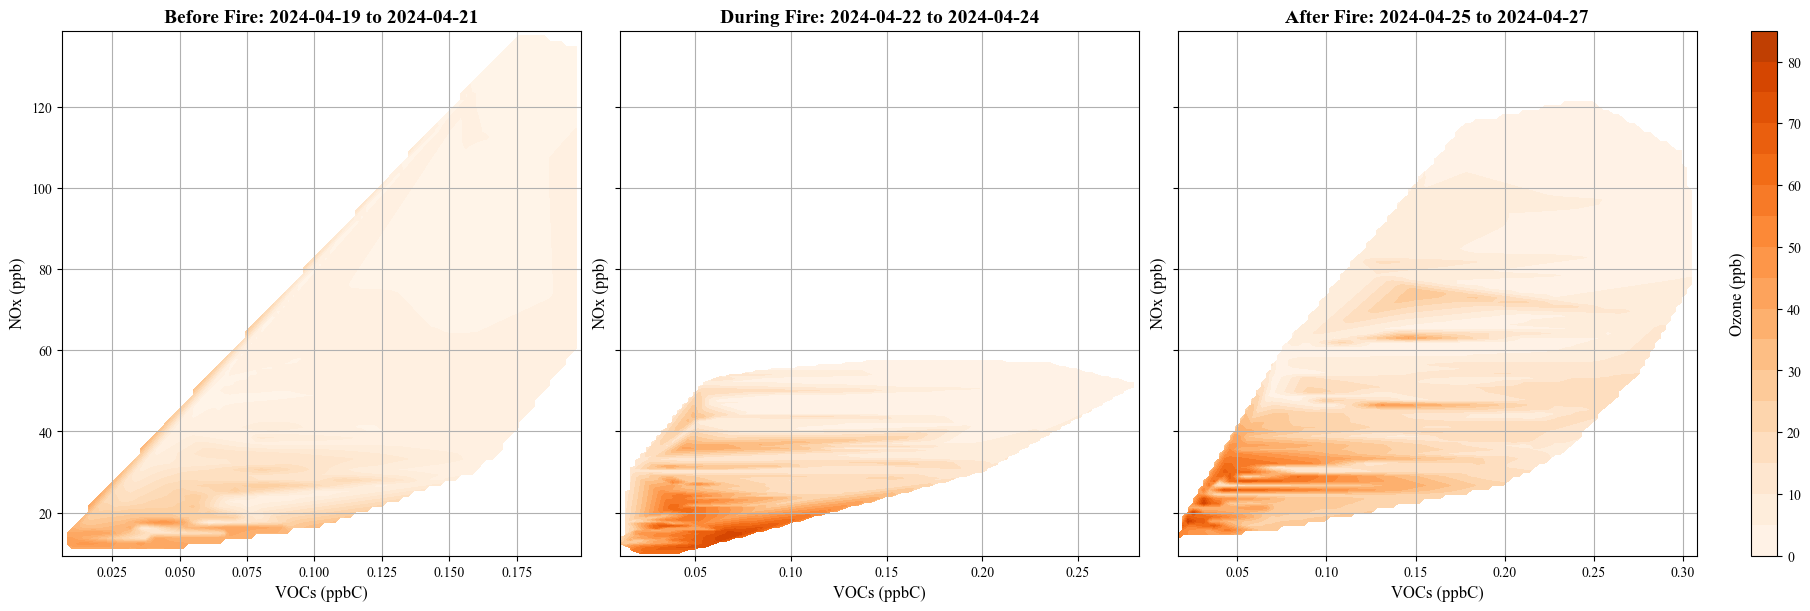

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib import rcParams

# Set font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams['text.usetex'] = False

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime
df['Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Conversion functions
def convert_to_ppb(µg_per_m3, molecular_weight):
    return µg_per_m3 * 24.45 / molecular_weight

# Molecular weights
molecular_weights = {
    'Toluene': 92.14,
    'Benzene': 78.11,
    'NO': 30.01,
    'NO2': 46.01,
    'Ozone': 48.00
}

# Carbon contents
carbon_contents = {
    'Toluene': 7 / 92.14,
    'Benzene': 6 / 78.11
}

# Convert VOCs to ppbC
df['Toluene_ppbC'] = convert_to_ppb(df['Toluene'], molecular_weights['Toluene']) * carbon_contents['Toluene']
df['Benzene_ppbC'] = convert_to_ppb(df['Benzene'], molecular_weights['Benzene']) * carbon_contents['Benzene']
df['VOCs_ppbC'] = df['Toluene_ppbC'] + df['Benzene_ppbC']

# Convert NO and NO2 to ppb
df['NO_ppb'] = convert_to_ppb(df['NO'], molecular_weights['NO'])
df['NO2_ppb'] = convert_to_ppb(df['NO2'], molecular_weights['NO2'])
df['NOx_ppb'] = df['NO_ppb'] + df['NO2_ppb']

# Convert Ozone to ppb
df['Ozone_ppb'] = convert_to_ppb(df['Ozone'], molecular_weights['Ozone'])

# Define date ranges and their titles
date_ranges = {
    'Before Fire': ('2024-04-19', '2024-04-21'),
    'During Fire': ('2024-04-22', '2024-04-24'),
    'After Fire': ('2024-04-25', '2024-04-27')
}

# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True, constrained_layout=True)

# Define a common color range for Ozone
vmin = df['Ozone_ppb'].dropna().min()
vmax = df['Ozone_ppb'].dropna().max()

# Plot each date range
for ax, (title, (start_date, end_date)) in zip(axes, date_ranges.items()):
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].dropna(subset=['VOCs_ppbC', 'NOx_ppb', 'Ozone_ppb'])
    
    x = filtered_df['VOCs_ppbC']
    y = filtered_df['NOx_ppb']
    z = filtered_df['Ozone_ppb']
    
    # Create grid and interpolate values
    grid_x, grid_y = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')
    
    # Contour plot
    contour = ax.contourf(grid_x, grid_y, grid_z, levels=15, cmap='Oranges', vmin=vmin, vmax=vmax)
    ax.set_title(f'{title}: {start_date} to {end_date}', fontsize=14, fontweight='bold')
    ax.set_xlabel('VOCs (ppbC)', fontsize=12)
    ax.set_ylabel('NOx (ppb)', fontsize=12)
    ax.grid(True)

# Add a single colorbar for all subplots
cbar = fig.colorbar(contour, ax=axes, orientation='vertical', pad=0.02)
cbar.set_label('Ozone (ppb)', fontsize=12)
cbar.ax.yaxis.set_label_position('left')  # Position the colorbar label to the left

plt.show()


In [23]:
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'
df=pd.read_excel(file_path,sheet_name=1)
df.keys()
df['From Date']

0        01-01-2024 00:00
1        01-01-2024 00:15
2        01-01-2024 00:30
3        01-01-2024 00:45
4        01-01-2024 01:00
               ...       
14924    04-06-2024 11:00
14925    04-06-2024 11:15
14926    04-06-2024 11:30
14927    04-06-2024 11:45
14928    04-06-2024 12:00
Name: From Date, Length: 14929, dtype: object

File exists


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_1024/2455845782.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Timestamp'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')
/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_1024/2455845782.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[period]['Hour'] = filtered_data[period]['Timestamp'].dt.hour
/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_1024/2455845782.py

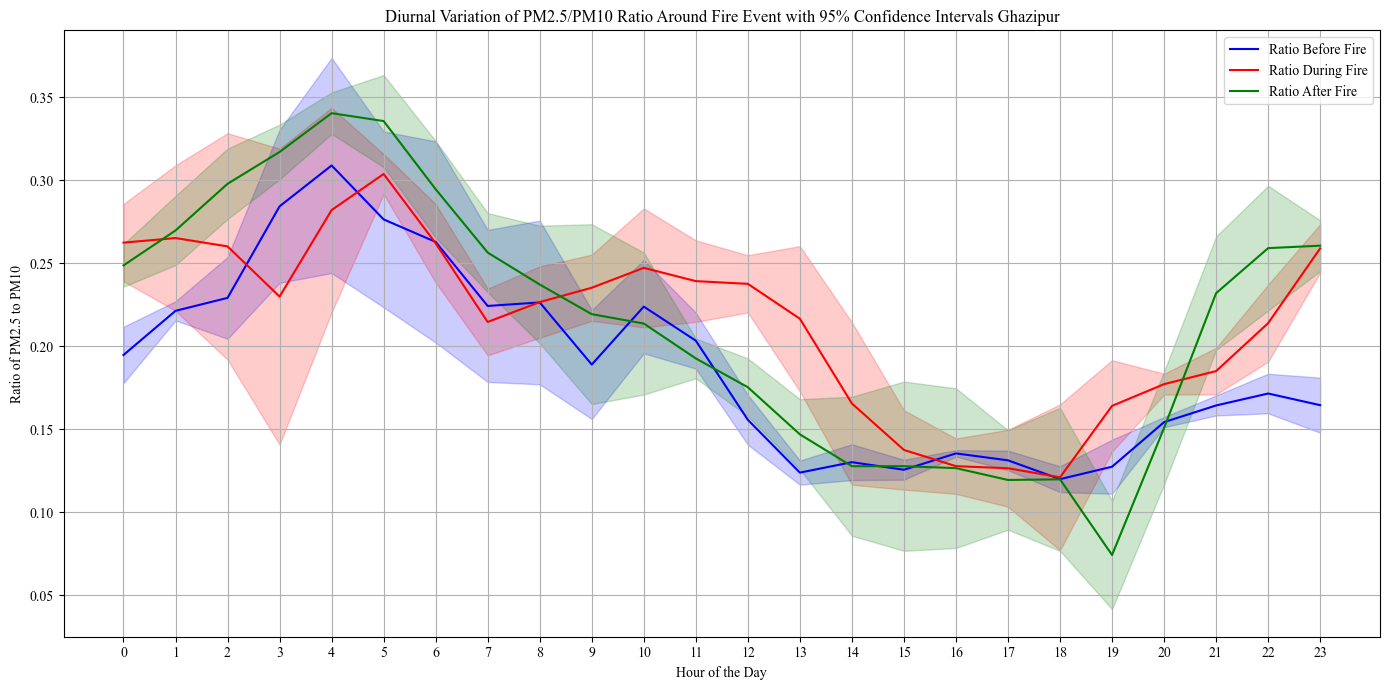

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Define the file path
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Check if the file exists
if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")

# Load the dataset
df = pd.read_excel(file_path, sheet_name=1)

# Drop rows where 'From Date', 'PM2.5', or 'PM10' is NaN
df_clean = df.dropna(subset=['From Date', 'PM2.5', 'PM10'])

# Convert 'From Date' to datetime using the correct format
df_clean['Timestamp'] = pd.to_datetime(df_clean['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Define the date ranges
date_ranges = {
    'Before Fire': ('2024-04-19', '2024-04-21'),
    'During Fire': ('2024-04-22', '2024-04-24'),
    'After Fire': ('2024-04-25', '2024-04-27')
}

# Create a dictionary to store filtered data
filtered_data = {}

# Filter the data for each date range
for period, (start_date, end_date) in date_ranges.items():
    filtered_data[period] = df_clean[(df_clean['Timestamp'] >= start_date) & (df_clean['Timestamp'] <= end_date)]
    filtered_data[period]['Hour'] = filtered_data[period]['Timestamp'].dt.hour

# Compute the ratio of PM2.5 to PM10
for period, data in filtered_data.items():
    data['PM2.5/PM10'] = data['PM2.5'] / data['PM10']

# Compute mean, standard error, and confidence interval for the ratio each hour
def compute_ci(df_filtered):
    grouped = df_filtered.groupby('Hour')['PM2.5/PM10']
    mean = grouped.mean()
    std_err = grouped.sem()
    ci = 1.96 * std_err  # 95% CI
    return mean, ci

# Calculate mean and CI for each period
mean_ci = {}
for period, data in filtered_data.items():
    mean, ci = compute_ci(data)
    mean_ci[period] = {'mean': mean, 'ci': ci}

# Plotting
plt.figure(figsize=(14, 7))

# Plot for each period with confidence intervals
colors = {'Before Fire': 'b', 'During Fire': 'r', 'After Fire': 'g'}
for period, stats in mean_ci.items():
    plt.plot(stats['mean'].index, stats['mean'], label=f'Ratio {period}', color=colors[period])
    plt.fill_between(stats['mean'].index, stats['mean'] - stats['ci'], stats['mean'] + stats['ci'], color=colors[period], alpha=0.2)

plt.xlabel('Hour of the Day')
plt.ylabel('Ratio of PM2.5 to PM10')
plt.title('Diurnal Variation of PM2.5/PM10 Ratio Around Fire Event with 95% Confidence Intervals Ghazipur')
plt.xticks(range(24))  # Show each hour on x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


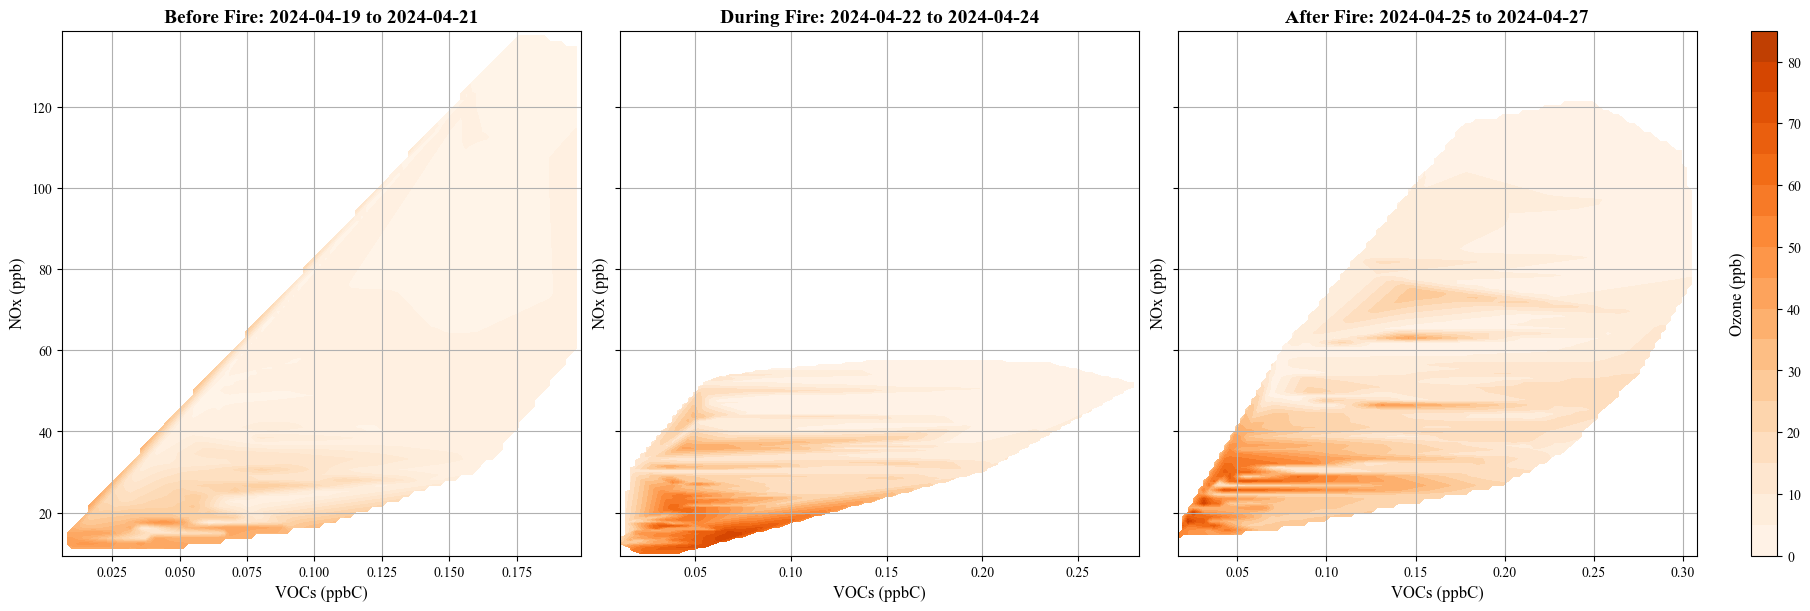

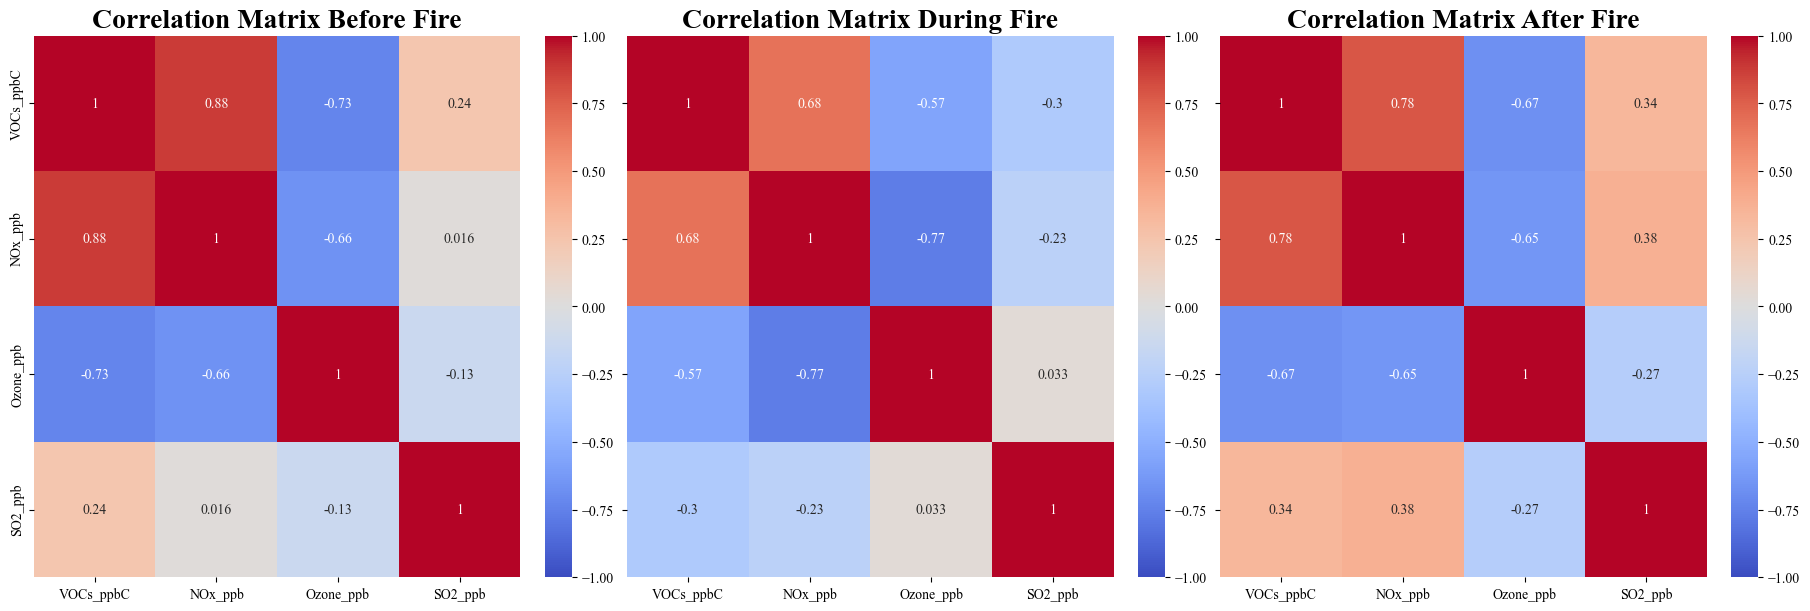

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib import rcParams
import seaborn as sns

# Set font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams['text.usetex'] = False

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime
df['Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Conversion functions
def convert_to_ppb(µg_per_m3, molecular_weight):
    return µg_per_m3 * 24.45 / molecular_weight

# Molecular weights
molecular_weights = {
    'Toluene': 92.14,
    'Benzene': 78.11,
    'NO': 30.01,
    'NO2': 46.01,
    'Ozone': 48.00,
    'SO2': 64.07  # Add molecular weight for SO2
}

# Carbon contents
carbon_contents = {
    'Toluene': 7 / 92.14,
    'Benzene': 6 / 78.11
}

# Convert VOCs to ppbC
df['Toluene_ppbC'] = convert_to_ppb(df['Toluene'], molecular_weights['Toluene']) * carbon_contents['Toluene']
df['Benzene_ppbC'] = convert_to_ppb(df['Benzene'], molecular_weights['Benzene']) * carbon_contents['Benzene']
df['VOCs_ppbC'] = df['Toluene_ppbC'] + df['Benzene_ppbC']

# Convert NO, NO2, SO2 to ppb
df['NO_ppb'] = convert_to_ppb(df['NO'], molecular_weights['NO'])
df['NO2_ppb'] = convert_to_ppb(df['NO2'], molecular_weights['NO2'])
df['NOx_ppb'] = df['NO_ppb'] + df['NO2_ppb']
df['SO2_ppb'] = convert_to_ppb(df['SO2'], molecular_weights['SO2'])

# Convert Ozone to ppb
df['Ozone_ppb'] = convert_to_ppb(df['Ozone'], molecular_weights['Ozone'])

# Define date ranges and their titles
date_ranges = {
    'Before Fire': ('2024-04-19', '2024-04-21'),
    'During Fire': ('2024-04-22', '2024-04-24'),
    'After Fire': ('2024-04-25', '2024-04-27')
}

# Create the figure and axes for contour plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True, constrained_layout=True)

# Define a common color range for Ozone
vmin = df['Ozone_ppb'].dropna().min()
vmax = df['Ozone_ppb'].dropna().max()

# Plot each date range
for ax, (title, (start_date, end_date)) in zip(axes, date_ranges.items()):
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].dropna(subset=['VOCs_ppbC', 'NOx_ppb', 'Ozone_ppb'])
    
    x = filtered_df['VOCs_ppbC']
    y = filtered_df['NOx_ppb']
    z = filtered_df['Ozone_ppb']
    
    # Create grid and interpolate values
    grid_x, grid_y = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
    grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')
    
    # Contour plot
    contour = ax.contourf(grid_x, grid_y, grid_z, levels=15, cmap='Oranges', vmin=vmin, vmax=vmax)
    ax.set_title(f'{title}: {start_date} to {end_date}', fontsize=14, fontweight='bold')
    ax.set_xlabel('VOCs (ppbC)', fontsize=12)
    ax.set_ylabel('NOx (ppb)', fontsize=12)
    ax.grid(True)

# Add a single colorbar for all subplots
cbar = fig.colorbar(contour, ax=axes, orientation='vertical', pad=0.02)
cbar.set_label('Ozone (ppb)', fontsize=12)
cbar.ax.yaxis.set_label_position('left')  # Position the colorbar label to the left

plt.show()

# Create the figure and axes for correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, constrained_layout=True)

for ax, (title, (start_date, end_date)) in zip(axes, date_ranges.items()):
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].dropna(subset=['VOCs_ppbC', 'NOx_ppb', 'Ozone_ppb', 'SO2_ppb'])
    
    # Compute the correlation matrix
    corr_matrix = filtered_df[['VOCs_ppbC', 'NOx_ppb', 'Ozone_ppb', 'SO2_ppb']].corr()
    
    # Plot the correlation matrix
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax, vmin=-1, vmax=1)
    ax.set_title(f'Correlation Matrix {title}', fontsize=20, fontweight='bold')

plt.show()


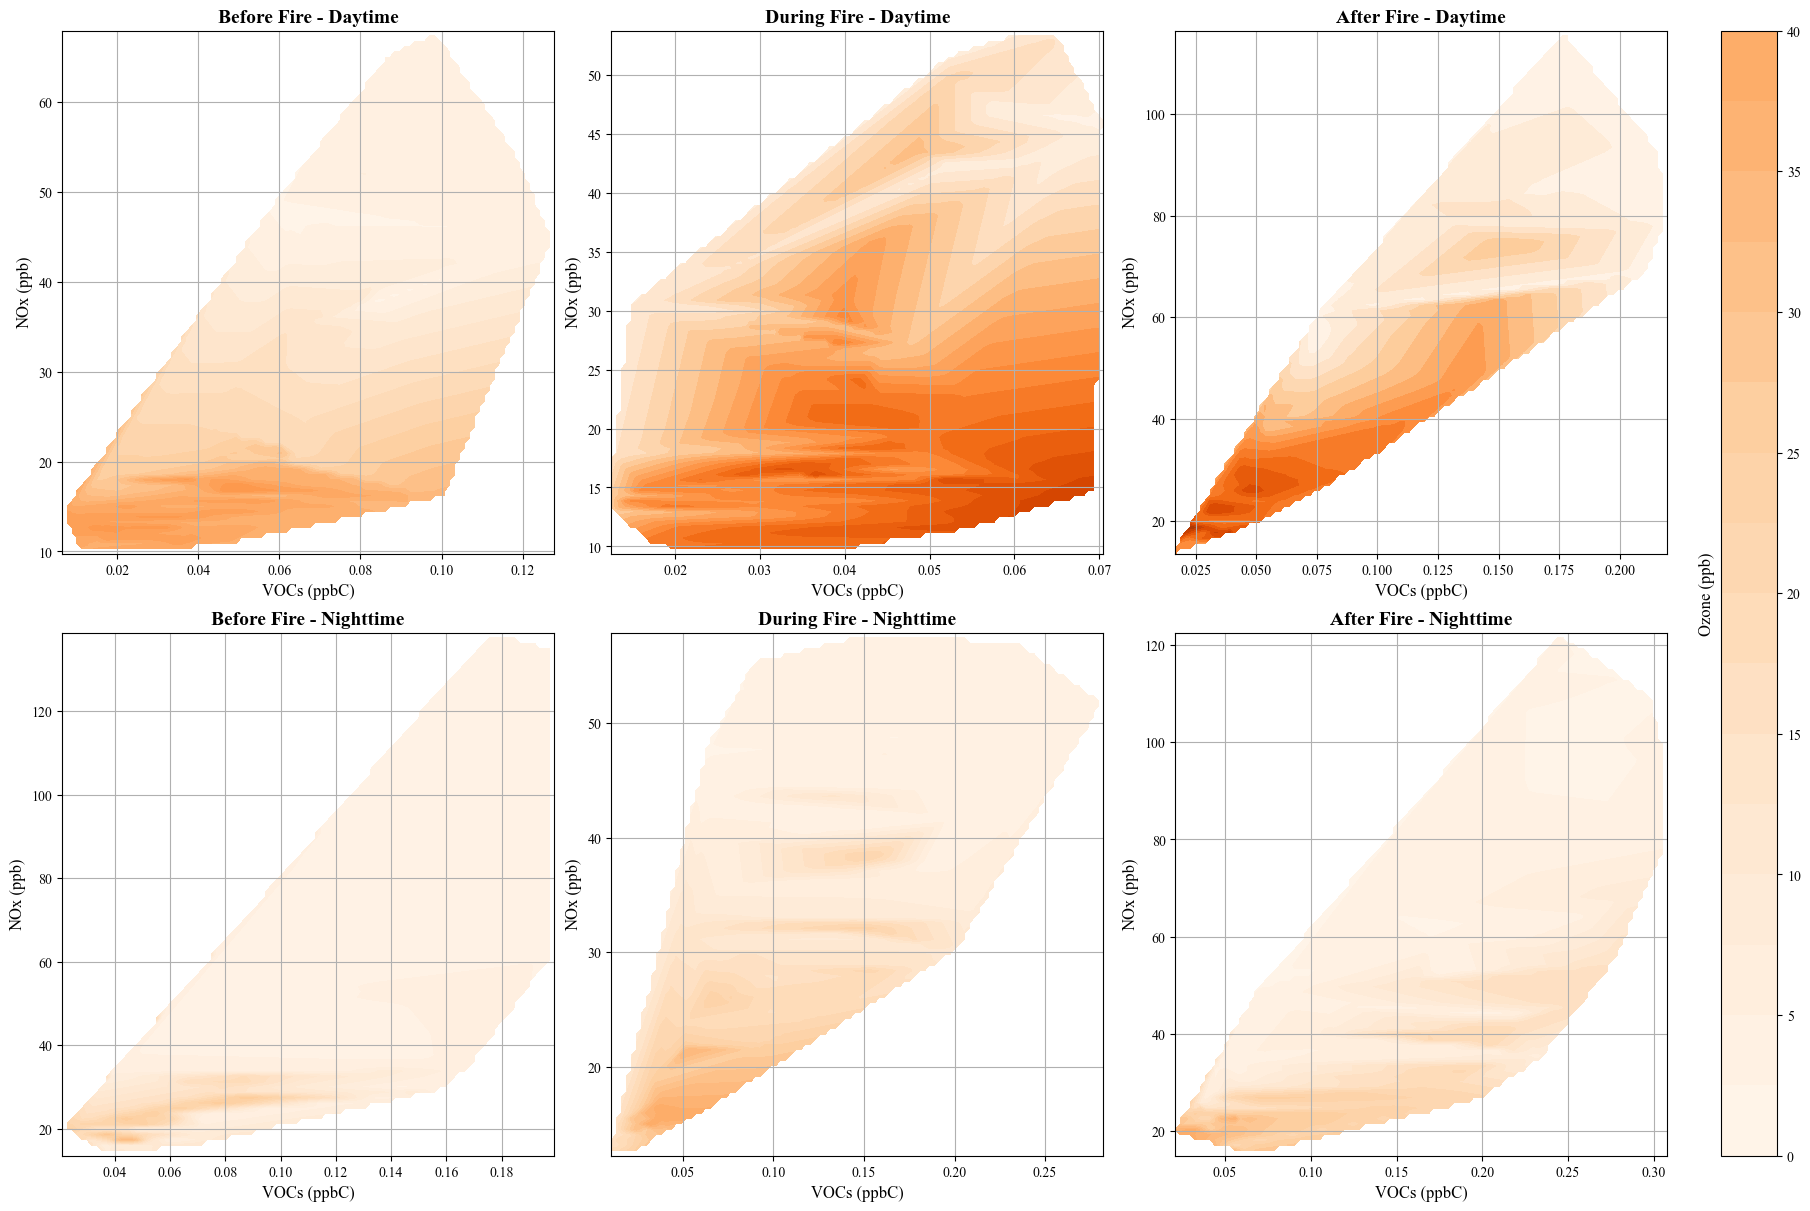

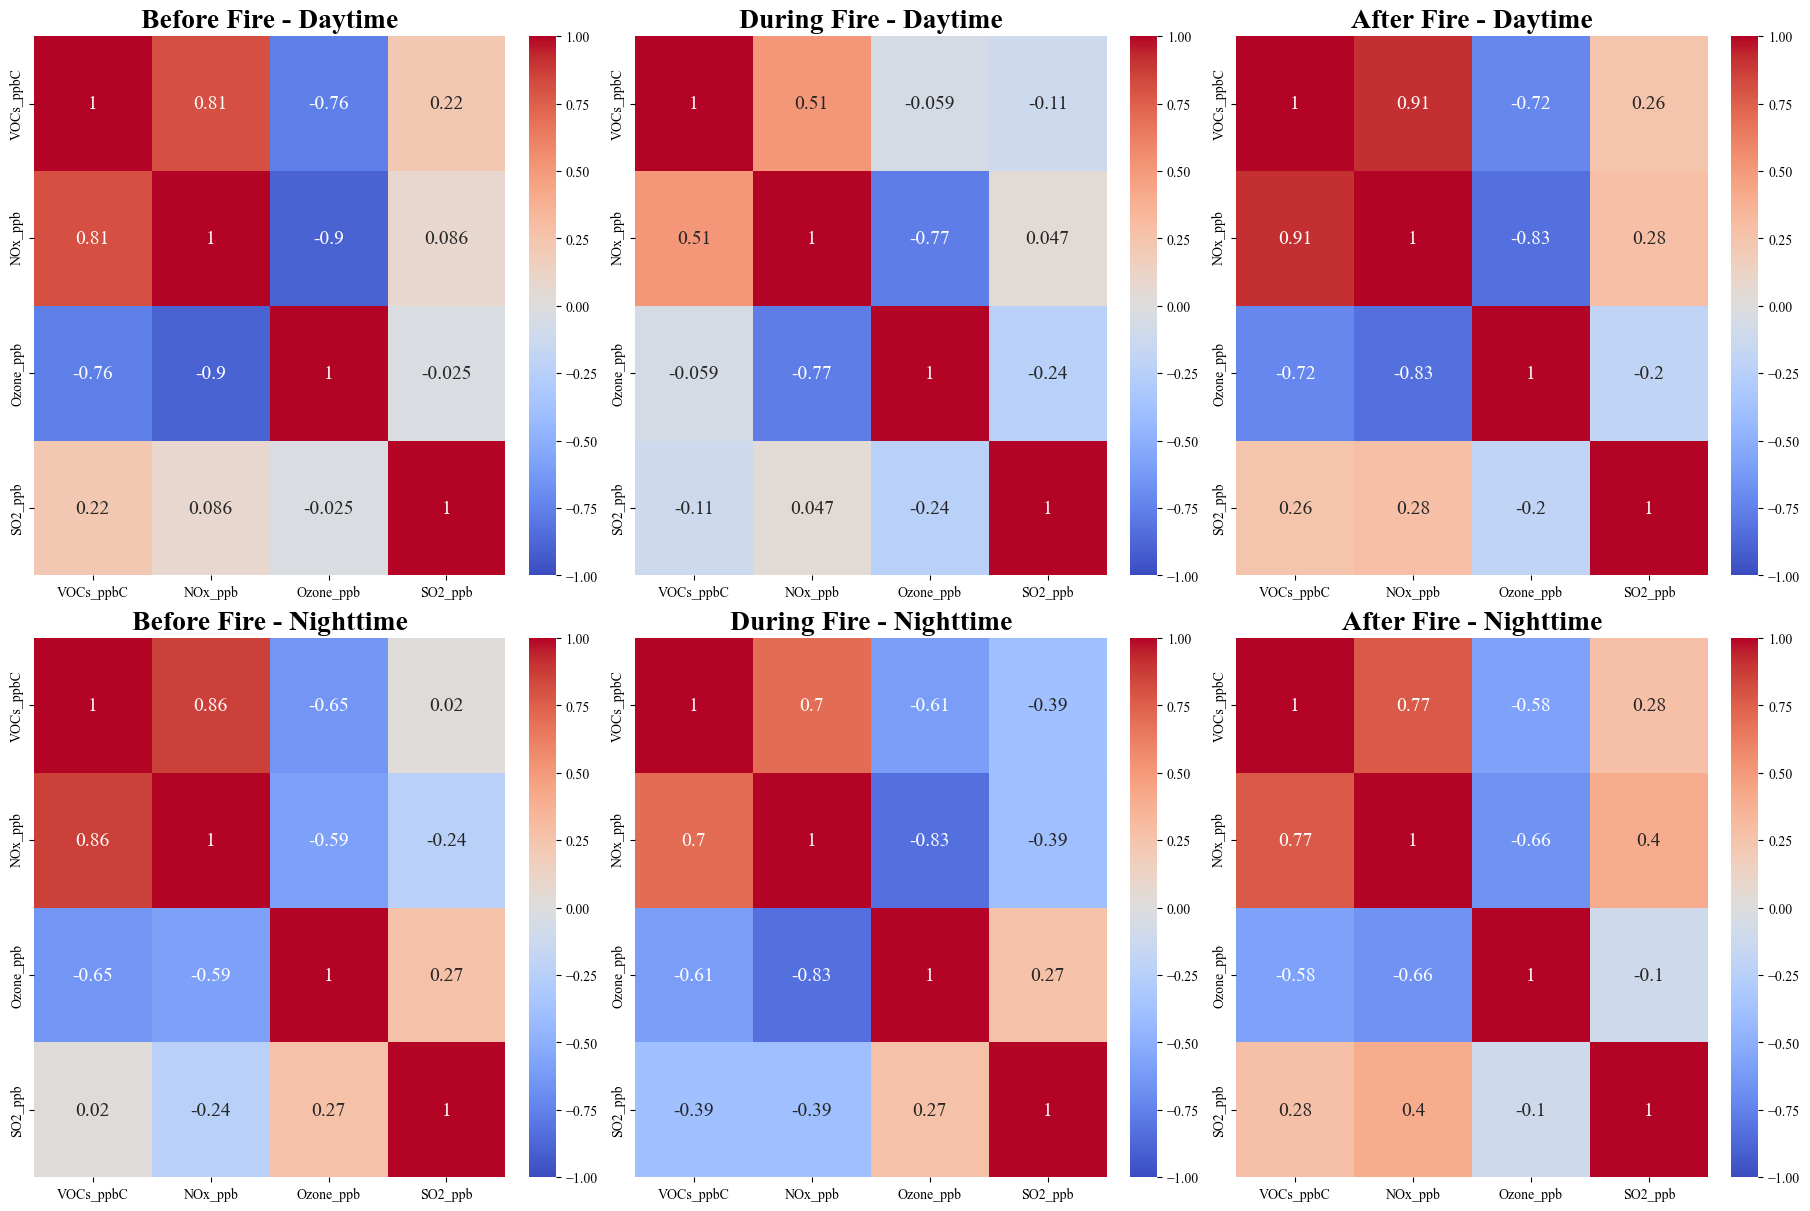

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from matplotlib import rcParams
import seaborn as sns

# Set font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams['text.usetex'] = False

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime
df['Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Define daytime and nighttime periods
def is_daytime(date_time):
    return 6 <= date_time.hour < 18

# Conversion functions
def convert_to_ppb(µg_per_m3, molecular_weight):
    return µg_per_m3 * 24.45 / molecular_weight

# Molecular weights
molecular_weights = {
    'Toluene': 92.14,
    'Benzene': 78.11,
    'NO': 30.01,
    'NO2': 46.01,
    'Ozone': 48.00,
    'SO2': 64.07  # Add molecular weight for SO2
}

# Carbon contents
carbon_contents = {
    'Toluene': 7 / 92.14,
    'Benzene': 6 / 78.11
}

# Convert VOCs to ppbC
df['Toluene_ppbC'] = convert_to_ppb(df['Toluene'], molecular_weights['Toluene']) * carbon_contents['Toluene']
df['Benzene_ppbC'] = convert_to_ppb(df['Benzene'], molecular_weights['Benzene']) * carbon_contents['Benzene']
df['VOCs_ppbC'] = df['Toluene_ppbC'] + df['Benzene_ppbC']

# Convert NO, NO2, SO2 to ppb
df['NO_ppb'] = convert_to_ppb(df['NO'], molecular_weights['NO'])
df['NO2_ppb'] = convert_to_ppb(df['NO2'], molecular_weights['NO2'])
df['NOx_ppb'] = df['NO_ppb'] + df['NO2_ppb']
df['SO2_ppb'] = convert_to_ppb(df['SO2'], molecular_weights['SO2'])

# Convert Ozone to ppb
df['Ozone_ppb'] = convert_to_ppb(df['Ozone'], molecular_weights['Ozone'])

# Define date ranges and their titles
date_ranges = {
    'Before Fire': ('2024-04-19', '2024-04-21'),
    'During Fire': ('2024-04-22', '2024-04-24'),
    'After Fire': ('2024-04-25', '2024-04-27')
}

# Create the figure and axes for contour plots and correlation matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)

# Top row for Daytime, Bottom row for Nighttime
for idx, (title, (start_date, end_date)) in enumerate(date_ranges.items()):
    for period, row in zip(['Daytime', 'Nighttime'], [0, 1]):
        filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].dropna(subset=['VOCs_ppbC', 'NOx_ppb', 'Ozone_ppb'])
        filtered_df = filtered_df[filtered_df['Date'].apply(is_daytime) if period == 'Daytime' else ~filtered_df['Date'].apply(is_daytime)]
        
        x = filtered_df['VOCs_ppbC']
        y = filtered_df['NOx_ppb']
        z = filtered_df['Ozone_ppb']
        
        # Create grid and interpolate values
        grid_x, grid_y = np.mgrid[x.min():x.max():100j, y.min():y.max():100j]
        grid_z = griddata((x, y), z, (grid_x, grid_y), method='linear')
        
        # Contour plot
        contour = axes[row, idx].contourf(grid_x, grid_y, grid_z, levels=15, cmap='Oranges', vmin=df['Ozone_ppb'].dropna().min(), vmax=df['Ozone_ppb'].dropna().max())
        axes[row, idx].set_title(f'{title} - {period}', fontsize=14, fontweight='bold')
        axes[row, idx].set_xlabel('VOCs (ppbC)', fontsize=12)
        axes[row, idx].set_ylabel('NOx (ppb)', fontsize=12)
        axes[row, idx].grid(True)

# Add a single colorbar for all subplots
cbar = fig.colorbar(contour, ax=axes, orientation='vertical', pad=0.02)
cbar.set_label('Ozone (ppb)', fontsize=12)
cbar.ax.yaxis.set_label_position('left')  # Position the colorbar label to the left

plt.show()

# Create the figure and axes for correlation matrices (Daytime and Nighttime)
fig, axes = plt.subplots(2, 3, figsize=(18, 12), constrained_layout=True)

for idx, (title, (start_date, end_date)) in enumerate(date_ranges.items()):
    for period, row in zip(['Daytime', 'Nighttime'], [0, 1]):
        filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].dropna(subset=['VOCs_ppbC', 'NOx_ppb', 'Ozone_ppb', 'SO2_ppb'])
        filtered_df = filtered_df[filtered_df['Date'].apply(is_daytime) if period == 'Daytime' else ~filtered_df['Date'].apply(is_daytime)]
        
        # Compute the correlation matrix
        corr_matrix = filtered_df[['VOCs_ppbC', 'NOx_ppb', 'Ozone_ppb', 'SO2_ppb']].corr()
        
        # Plot the correlation matrix
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[row, idx], vmin=-1, vmax=1, annot_kws={"size": 14})
        axes[row, idx].set_title(f'{title} - {period}', fontsize=20, fontweight='bold')

plt.show()


RuntimeError: Colorbar layout of new layout engine not compatible with old engine, and a colorbar has been created.  Engine not changed.

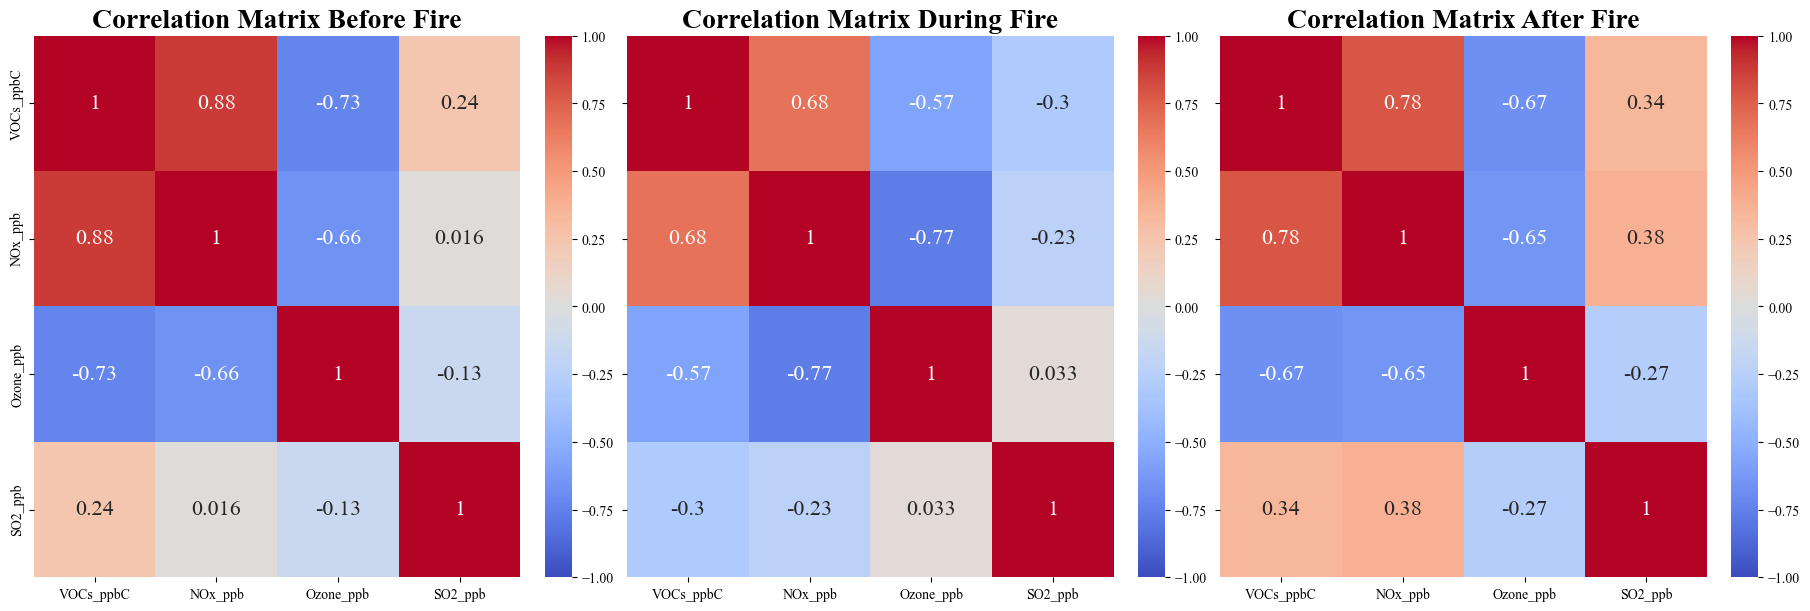

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the file path
file_path = '/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime
df['Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')

# Ensure VOC and gas columns are numeric
df['Toluene'] = pd.to_numeric(df['Toluene'], errors='coerce')
df['Benzene'] = pd.to_numeric(df['Benzene'], errors='coerce')
df['NO'] = pd.to_numeric(df['NO'], errors='coerce')
df['NO2'] = pd.to_numeric(df['NO2'], errors='coerce')
df['Ozone'] = pd.to_numeric(df['Ozone'], errors='coerce')
df['SO2'] = pd.to_numeric(df['SO2'], errors='coerce')

# Conversion functions
def convert_to_ppb(µg_per_m3, molecular_weight):
    return µg_per_m3 * 24.45 / molecular_weight

# Molecular weights
molecular_weights = {
    'Toluene': 92.14,
    'Benzene': 78.11,
    'NO': 30.01,
    'NO2': 46.01,
    'Ozone': 48.00,
    'SO2': 64.07
}

# Carbon contents
carbon_contents = {
    'Toluene': 7 / 92.14,
    'Benzene': 6 / 78.11
}

# Convert VOCs to ppbC
df['Toluene_ppbC'] = convert_to_ppb(df['Toluene'], molecular_weights['Toluene']) * carbon_contents['Toluene']
df['Benzene_ppbC'] = convert_to_ppb(df['Benzene'], molecular_weights['Benzene']) * carbon_contents['Benzene']
df['VOCs_ppbC'] = df['Toluene_ppbC'] + df['Benzene_ppbC']

# Convert NO, NO2, SO2 to ppb
df['NO_ppb'] = convert_to_ppb(df['NO'], molecular_weights['NO'])
df['NO2_ppb'] = convert_to_ppb(df['NO2'], molecular_weights['NO2'])
df['NOx_ppb'] = df['NO_ppb'] + df['NO2_ppb']
df['SO2_ppb'] = convert_to_ppb(df['SO2'], molecular_weights['SO2'])

# Convert Ozone to ppb
df['Ozone_ppb'] = convert_to_ppb(df['Ozone'], molecular_weights['Ozone'])

# Define date ranges
date_ranges = {
    'Before Fire': ('2024-04-19', '2024-04-21'),
    'During Fire': ('2024-04-22', '2024-04-24'),
    'After Fire': ('2024-04-25', '2024-04-27')
}

# Create the figure and axes for correlation matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True, constrained_layout=True)

for ax, (title, (start_date, end_date)) in zip(axes, date_ranges.items()):
    filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)].dropna(subset=['VOCs_ppbC', 'NOx_ppb', 'Ozone_ppb', 'SO2_ppb'])
    
    # Compute the correlation matrix
    corr_matrix = filtered_df[['VOCs_ppbC', 'NOx_ppb', 'Ozone_ppb', 'SO2_ppb']].corr()
    
    # Plot the correlation matrix
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        ax=ax,
        vmin=-1,
        vmax=1,
        annot_kws={"size": 16}  # Set font size of annotations
    )
    ax.set_title(f'Correlation Matrix {title}', fontsize=20, fontweight='bold')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [58]:
df.keys()

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone',
       'Benzene', 'Toluene', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'AT',
       'RF'],
      dtype='object')

/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_1024/3632726003.py:34: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_means = df.resample('H').mean()


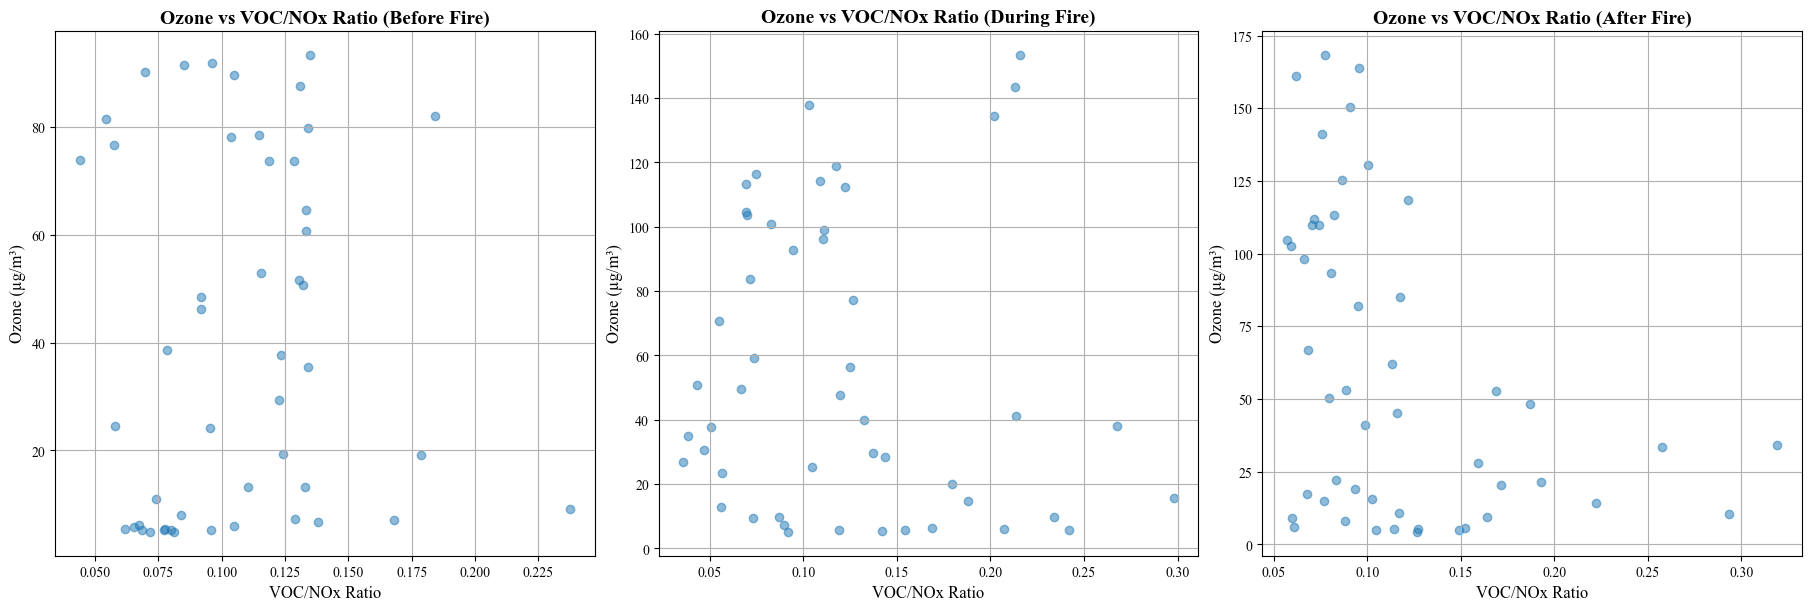

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import binned_statistic
from matplotlib import rcParams

# Set font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams['text.usetex'] = False

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime and set as index
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')
df.set_index('From Date', inplace=True)

# Drop 'To Date' column if it's not needed
df.drop(columns='To Date', inplace=True, errors='ignore')

# Convert all columns to numeric, coerce errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN in critical columns
df = df.dropna(subset=['Toluene', 'Benzene', 'NO', 'NO2', 'NOx', 'Ozone'])

# Calculate hourly means
hourly_means = df.resample('H').mean()

# Calculate VOC/NOx ratio
hourly_means['VOC_NOx_ratio'] = hourly_means[['Toluene', 'Benzene']].sum(axis=1) / hourly_means['NOx']

# Define date ranges and their titles
date_ranges = {
    'Before Fire': ('2024-04-19', '2024-04-21'),
    'During Fire': ('2024-04-22', '2024-04-24'),
    'After Fire': ('2024-04-25', '2024-04-27')
}

# Create the figure and axes for plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

for idx, (title, (start_date, end_date)) in enumerate(date_ranges.items()):
    # Filter data for date range
    filtered_df = hourly_means[(hourly_means.index >= start_date) & (hourly_means.index <= end_date)]
    
    # Remove NaN values
    filtered_df = filtered_df.dropna(subset=['VOC_NOx_ratio', 'Ozone'])
    
    # Plot
    axes[idx].scatter(filtered_df['VOC_NOx_ratio'], filtered_df['Ozone'], alpha=0.5)
    axes[idx].set_title(f'Ozone vs VOC/NOx Ratio ({title})', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('VOC/NOx Ratio', fontsize=12)
    axes[idx].set_ylabel('Ozone (µg/m³)', fontsize=12)
    axes[idx].grid(True)

plt.show()


In [54]:
df

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,Temp,RH,WS,WD,SR,BP,VWS,AT,RF,Date
0,01-01-2024 00:00,01-01-2024 00:15,164.0,295.0,14.0,51.3,38.7,36.5,3.2,1.00,...,NaN,81.4,0.6,256.9,52.4,995.0,NaN,10.1,0.0,2024-01-01 00:00:00
1,01-01-2024 00:15,01-01-2024 00:30,164.0,295.0,7.9,50.4,33.2,36.2,3.0,1.00,...,NaN,81.7,0.7,333.9,52.4,994.8,NaN,10.1,0.0,2024-01-01 00:15:00
2,01-01-2024 00:30,01-01-2024 00:45,164.0,295.0,4.1,42.8,26.1,35.9,2.9,0.90,...,NaN,81.7,1.0,352.3,52.2,994.8,NaN,10.0,0.0,2024-01-01 00:30:00
3,01-01-2024 00:45,01-01-2024 01:00,182.0,328.0,9.7,49.9,34.5,36.0,2.8,0.90,...,NaN,81.7,2.1,2.0,52.4,994.8,NaN,10.0,0.0,2024-01-01 00:45:00
7,01-01-2024 01:45,01-01-2024 02:00,168.0,302.0,5.8,40.1,26.1,39.3,NaN,0.80,...,NaN,81.9,1.5,357.3,53.1,994.8,NaN,10.0,0.0,2024-01-01 01:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14923,04-06-2024 10:45,04-06-2024 11:00,52.0,194.0,6.4,36.9,24.9,31.5,15.5,1.39,...,NaN,42.0,5.7,72.0,238.0,976.0,NaN,36.7,0.0,2024-06-04 10:45:00
14924,04-06-2024 11:00,04-06-2024 11:15,95.0,354.0,6.2,41.4,27.1,31.9,15.5,1.40,...,NaN,41.0,4.2,105.0,344.0,977.0,NaN,37.0,0.0,2024-06-04 11:00:00
14925,04-06-2024 11:15,04-06-2024 11:30,95.0,354.0,6.7,41.7,27.6,31.5,19.1,1.45,...,NaN,40.0,4.1,136.0,447.0,977.0,NaN,37.7,0.0,2024-06-04 11:15:00
14926,04-06-2024 11:30,04-06-2024 11:45,95.0,354.0,7.3,42.0,28.3,33.7,13.5,1.36,...,NaN,39.0,2.7,130.0,428.0,977.0,NaN,38.5,0.0,2024-06-04 11:30:00


In [55]:
print(df.dtypes)


From Date            object
To Date              object
PM2.5               float64
PM10                float64
NO                  float64
NO2                 float64
NOx                 float64
NH3                 float64
SO2                 float64
CO                  float64
Ozone               float64
Benzene             float64
Toluene             float64
Temp                float64
RH                  float64
WS                  float64
WD                  float64
SR                  float64
BP                  float64
VWS                 float64
AT                  float64
RF                  float64
Date         datetime64[ns]
dtype: object


In [56]:
# Set 'Date' as index
df.set_index('Date', inplace=True)

# Resample to hourly mean
hourly_means = df.resample('H').mean()

# Calculate VOC/NOx ratio
hourly_means['VOC_NOx_ratio'] = hourly_means['VOCs_ppbC'] / hourly_means['NOx_ppb']

# Ensure no NaN values before plotting
hourly_means = hourly_means.dropna(subset=['VOC_NOx_ratio', 'Ozone_µg_per_m3'])


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_1024/1538157197.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_means = df.resample('H').mean()


TypeError: agg function failed [how->mean,dtype->object]

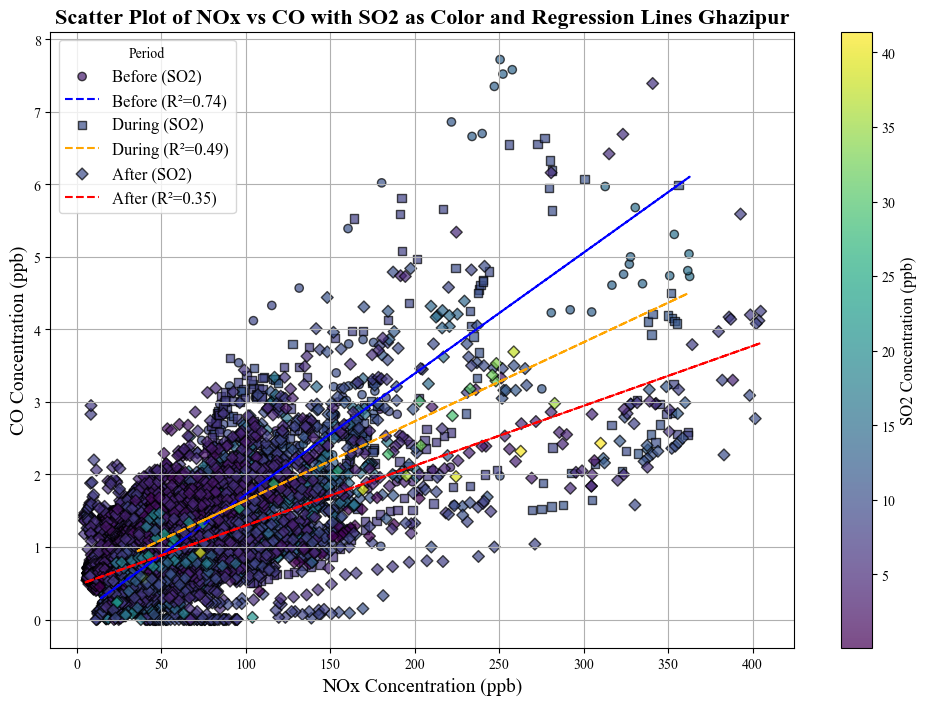

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import rcParams
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Set font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams['text.usetex'] = False

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime and set as index
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')
df.set_index('From Date', inplace=True)

# Drop 'To Date' column if it's not needed
df.drop(columns='To Date', inplace=True, errors='ignore')

# Convert all columns to numeric, coerce errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN in critical columns
df = df.dropna(subset=['NO', 'NO2', 'CO', 'SO2'])

# Add a period column based on the date (customize this based on your period definitions)
df['Period'] = np.where(df.index < '2024-01-15', 'Before',
                        np.where(df.index < '2024-02-01', 'During', 'After'))

# Calculate NOx from NO and NO2
df['NOx'] = df['NO'] + df['NO2']

# Plot setup
plt.figure(figsize=(12, 8))

# Define colors and markers for different periods
period_colors = {'Before': 'blue', 'During': 'orange', 'After': 'red'}
period_markers = {'Before': 'o', 'During': 's', 'After': 'D'}

# Create a scatter plot and store the handle for the color bar
scatter_handles = []

# Regression line plotting and R-squared calculation
for period, color in period_colors.items():
    period_data = df[df['Period'] == period]
    
    # Scatter plot
    scatter = plt.scatter(
        period_data['NOx'],
        period_data['CO'],
        c=period_data['SO2'],  # Use SO2 for the color dimension
        cmap='viridis',  # Color map for SO2
        norm=Normalize(vmin=df['SO2'].min(), vmax=df['SO2'].max()),
        label=f'{period} (SO2)',
        alpha=0.7,
        edgecolor='k',
        marker=period_markers[period]
    )
    
    scatter_handles.append(scatter)

    # Linear regression
    X = period_data[['NOx']].values
    y = period_data['CO'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    # Plot regression line
    plt.plot(
        X, y_pred, 
        color=color, 
        linestyle='--',
        label=f'{period} (R²={r2:.2f})'
    )

# Add color bar using the last scatter plot's mappable
cbar = plt.colorbar(scatter_handles[-1])
cbar.set_label('SO2 Concentration (ppb)', fontsize=12)

# Plot details
plt.title('Scatter Plot of NOx vs CO with SO2 as Color and Regression Lines Ghazipur', fontsize=16, fontweight='bold')
plt.xlabel('NOx Concentration (ppb)', fontsize=14)
plt.ylabel('CO Concentration (ppb)', fontsize=14)
plt.legend(title='Period', fontsize=12)
plt.grid(True)

plt.show()


/var/folders/d5/7y4f1s550h1gr7jtvhtm9dp80000gn/T/ipykernel_1024/3466930258.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


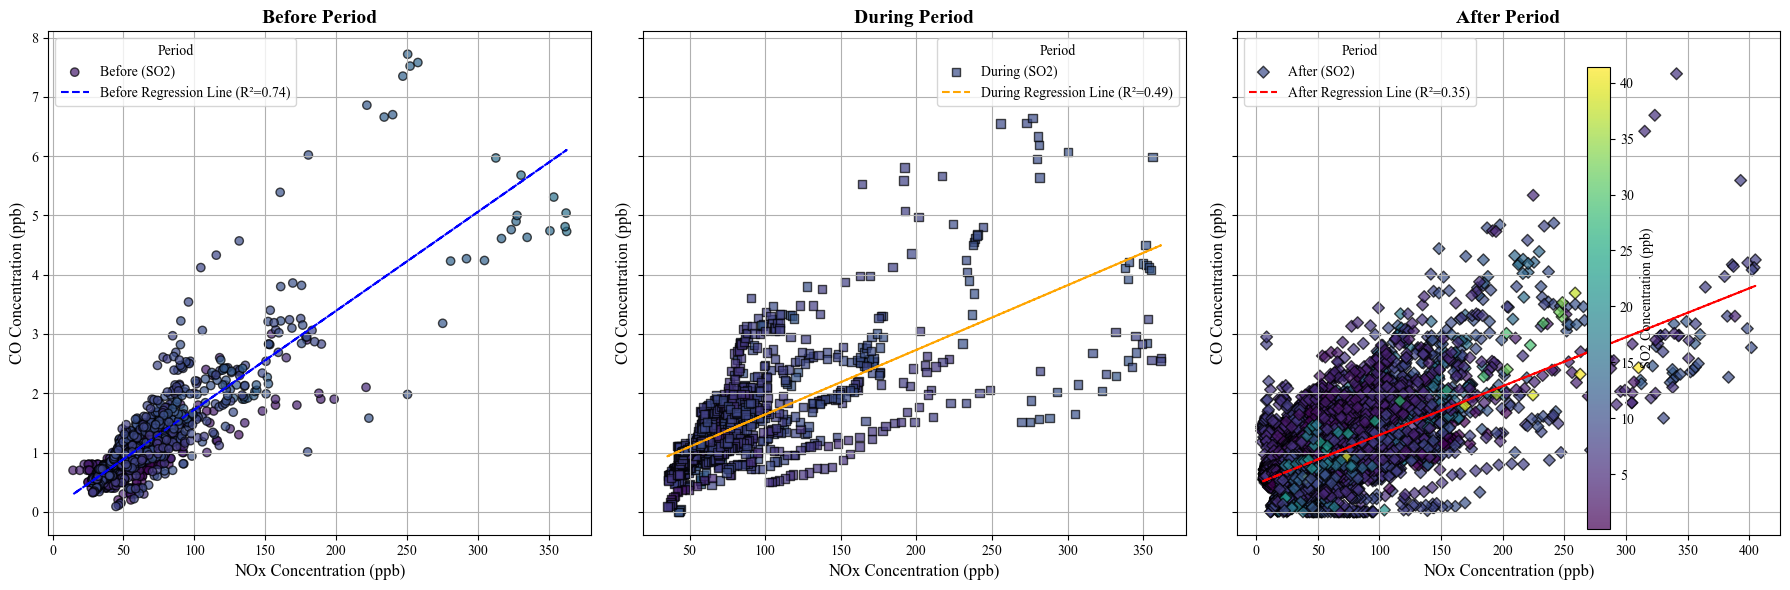

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import rcParams
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Set font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams['text.usetex'] = False

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime and set as index
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')
df.set_index('From Date', inplace=True)

# Drop 'To Date' column if it's not needed
df.drop(columns='To Date', inplace=True, errors='ignore')

# Convert all columns to numeric, coerce errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN in critical columns
df = df.dropna(subset=['NO', 'NO2', 'CO', 'SO2'])

# Add a period column based on the date (customize this based on your period definitions)
df['Period'] = np.where(df.index < '2024-01-15', 'Before',
                        np.where(df.index < '2024-02-01', 'During', 'After'))

# Calculate NOx from NO and NO2
df['NOx'] = df['NO'] + df['NO2']

# Plot setup
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define colors and markers for different periods
period_colors = {'Before': 'blue', 'During': 'orange', 'After': 'red'}
period_markers = {'Before': 'o', 'During': 's', 'After': 'D'}

# Create a scatter plot and regression line for each period
for i, (period, color) in enumerate(period_colors.items()):
    ax = axes[i]
    period_data = df[df['Period'] == period]
    
    # Scatter plot
    scatter = ax.scatter(
        period_data['NOx'],
        period_data['CO'],
        c=period_data['SO2'],  # Use SO2 for the color dimension
        cmap='viridis',  # Color map for SO2
        norm=Normalize(vmin=df['SO2'].min(), vmax=df['SO2'].max()),
        label=f'{period} (SO2)',
        alpha=0.7,
        edgecolor='k',
        marker=period_markers[period]
    )
    
    # Linear regression
    X = period_data[['NOx']].values
    y = period_data['CO'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    
    # Plot regression line
    ax.plot(
        X, y_pred, 
        color=color, 
        linestyle='--',
        label=f'{period} Regression Line (R²={r2:.2f})'
    )

    # Set axis labels and title
    ax.set_title(f'{period} Period', fontsize=14, fontweight='bold')
    ax.set_xlabel('NOx Concentration (ppb)', fontsize=12)
    ax.set_ylabel('CO Concentration (ppb)', fontsize=12)
    ax.grid(True)
    ax.legend(title='Period', fontsize=10)

# Add color bar using the last scatter plot's mappable
fig.colorbar(scatter, ax=axes, orientation='vertical', fraction=0.02, pad=0.1, label='SO2 Concentration (ppb)')

# Adjust layout to fit color bar
plt.tight_layout()

plt.show()


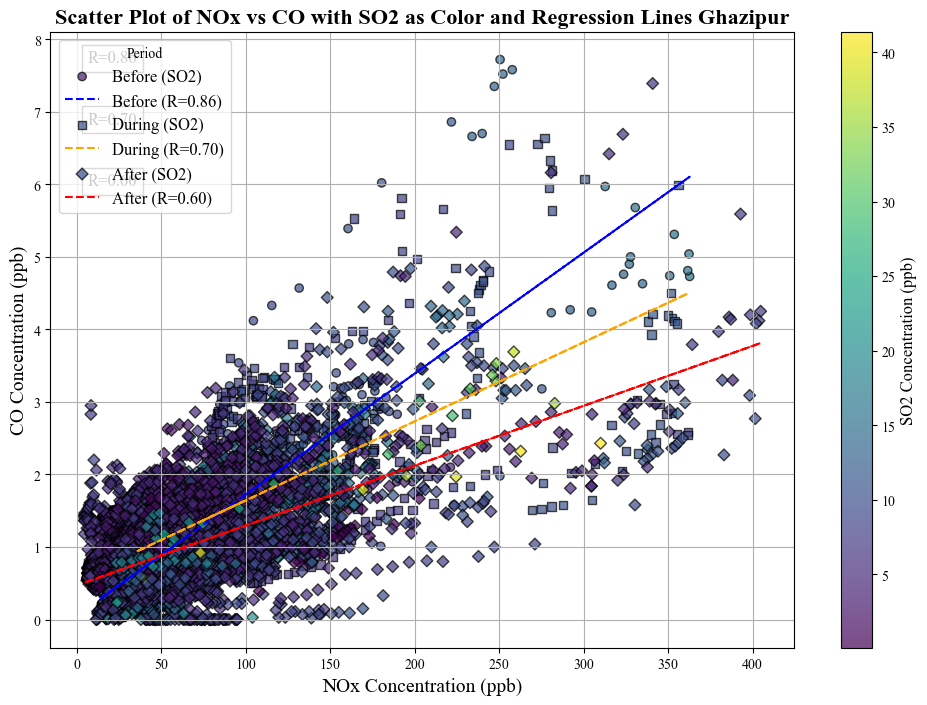

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from matplotlib import rcParams
from matplotlib.colors import Normalize

# Set font to Times New Roman
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = 'Times New Roman'
rcParams['text.usetex'] = False

# Define the file path
file_path = r'/Users/jayarajupakki/Documents/Phd/Project_Landfill_fires/Data/2024/Ghazipur/Patparganj_2024.xlsx'

# Load the Excel file
df = pd.read_excel(file_path, sheet_name=1)

# Convert 'From Date' to datetime and set as index
df['From Date'] = pd.to_datetime(df['From Date'], format='%d-%m-%Y %H:%M', errors='coerce')
df.set_index('From Date', inplace=True)

# Drop 'To Date' column if it's not needed
df.drop(columns='To Date', inplace=True, errors='ignore')

# Convert all columns to numeric, coerce errors to NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN in critical columns
df = df.dropna(subset=['NO', 'NO2', 'CO', 'SO2'])

# Add a period column based on the date (customize this based on your period definitions)
df['Period'] = np.where(df.index < '2024-01-15', 'Before',
                        np.where(df.index < '2024-02-01', 'During', 'After'))

# Calculate NOx from NO and NO2
df['NOx'] = df['NO'] + df['NO2']

# Plot setup
plt.figure(figsize=(12, 8))

# Define colors and markers for different periods
period_colors = {'Before': 'blue', 'During': 'orange', 'After': 'red'}
period_markers = {'Before': 'o', 'During': 's', 'After': 'D'}

# Create a scatter plot and store the handle for the color bar
scatter_handles = []

# Regression line plotting and R calculation
for period, color in period_colors.items():
    period_data = df[df['Period'] == period]
    
    # Scatter plot
    scatter = plt.scatter(
        period_data['NOx'],
        period_data['CO'],
        c=period_data['SO2'],  # Use SO2 for the color dimension
        cmap='viridis',  # Color map for SO2
        norm=Normalize(vmin=df['SO2'].min(), vmax=df['SO2'].max()),
        label=f'{period} (SO2)',
        alpha=0.7,
        edgecolor='k',
        marker=period_markers[period]
    )
    
    scatter_handles.append(scatter)

    # Linear regression
    X = period_data[['NOx']].values
    y = period_data['CO'].values
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    
    # Compute correlation coefficient
    correlation_matrix = np.corrcoef(X.flatten(), y)
    correlation_coefficient = correlation_matrix[0, 1]

    # Plot regression line
    plt.plot(
        X, y_pred, 
        color=color, 
        linestyle='--',
        label=f'{period} (R={correlation_coefficient:.2f})'
    )

    # Annotate the plot with correlation coefficient values
    plt.annotate(
        f'R={correlation_coefficient:.2f}',
        xy=(0.05, 0.95 - 0.1 * list(period_colors.keys()).index(period)),
        xycoords='axes fraction',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.7)
    )

# Add color bar using the last scatter plot's mappable
cbar = plt.colorbar(scatter_handles[-1])
cbar.set_label('SO2 Concentration (ppb)', fontsize=12)

# Plot details
plt.title('Scatter Plot of NOx vs CO with SO2 as Color and Regression Lines Ghazipur', fontsize=16, fontweight='bold')
plt.xlabel('NOx Concentration (ppb)', fontsize=14)
plt.ylabel('CO Concentration (ppb)', fontsize=14)
plt.legend(title='Period', fontsize=12)
plt.grid(True)

plt.show()
